In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('Yessenov Data Lab/Week 3/Day 2/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)

In [32]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
#data[['Embarked'] == 'Nan']
data['Embarked'] = data['Embarked'].fillna('S')

In [31]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

transformed_data = data.select_dtypes(include='object').apply(lambda x: le.fit_transform(x))
data1 = data.drop(data.select_dtypes(include='object'),axis=1)
data_full = pd.concat([data1, transformed_data], axis=1)
data_full.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [37]:
X = data_full.drop(['Survived'], axis=1)
y = data_full['Survived']

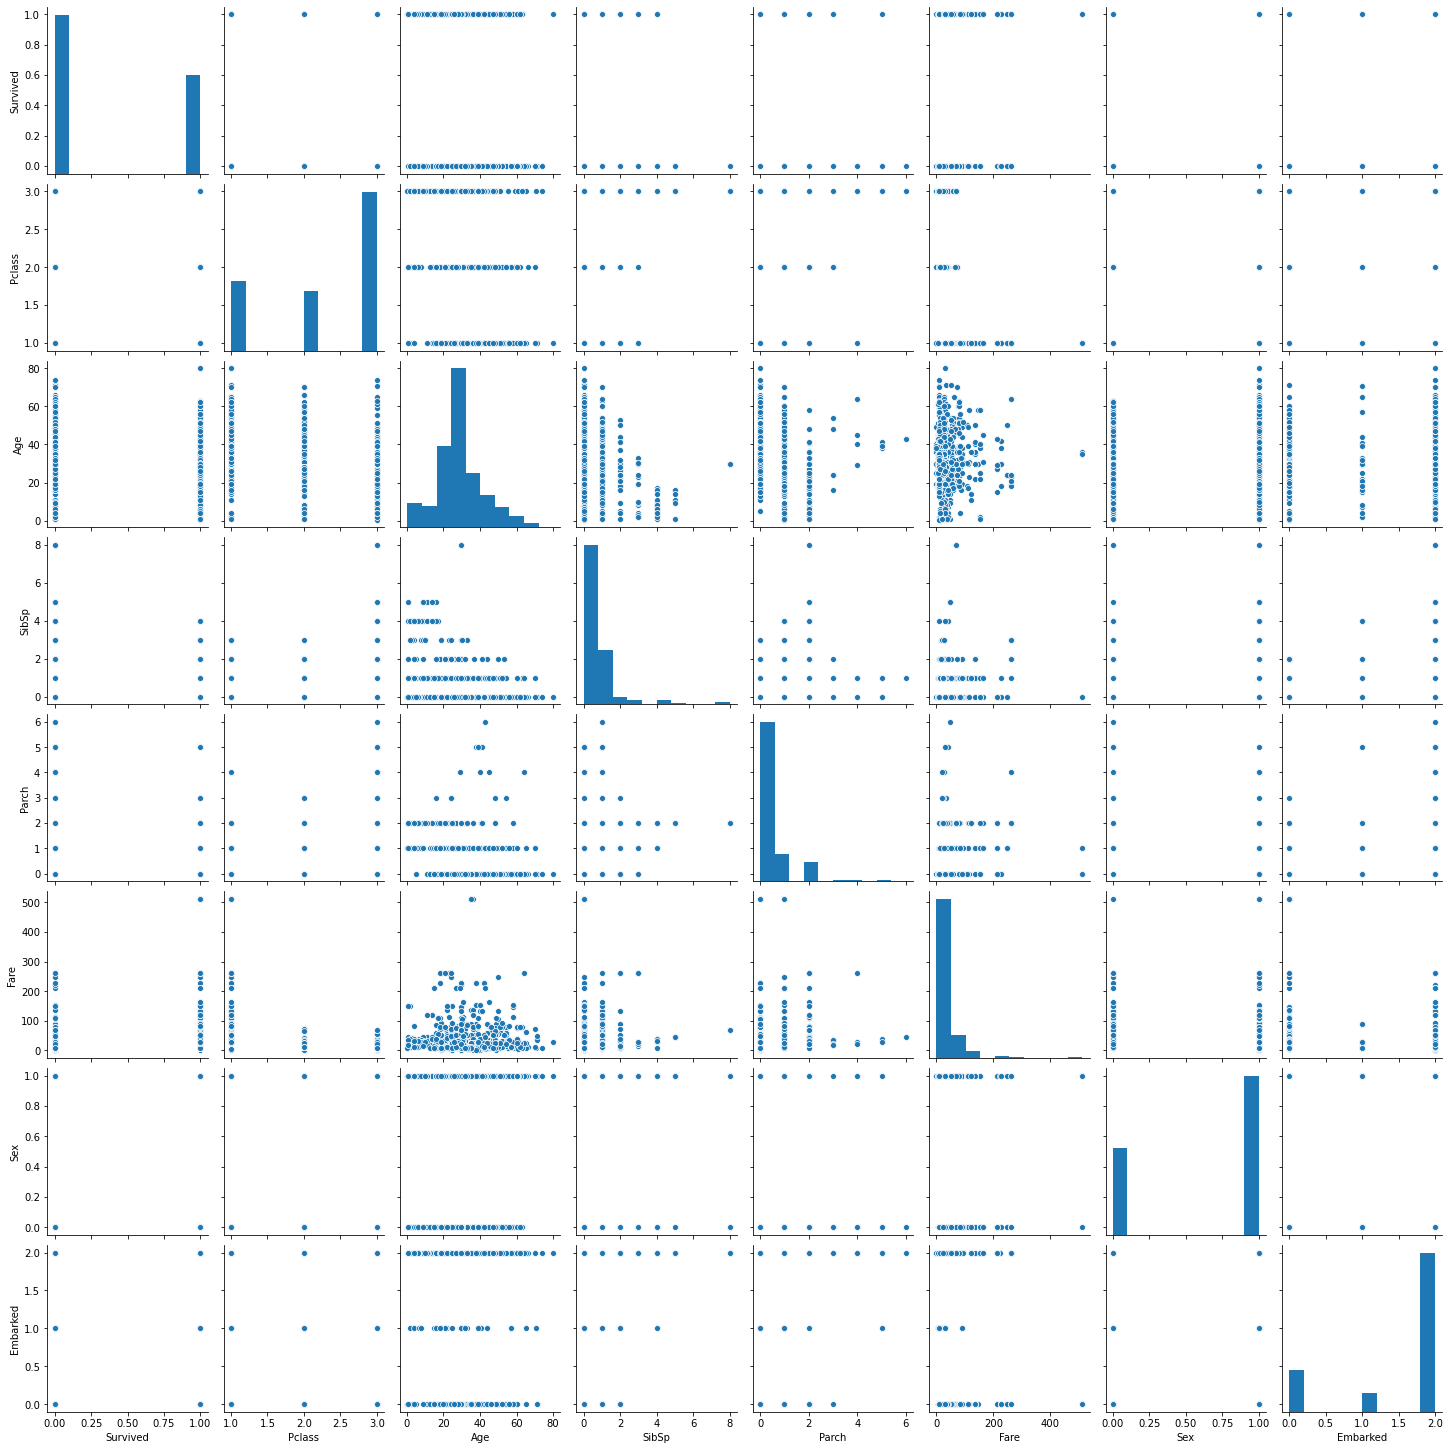

In [34]:
sns.pairplot(data_full)

## Scaling, training & testing

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
bag_scores = cross_val_score(bag_model, x, y, scoring='accuracy', cv=10)

In [ ]:
names = ["SVC", "Nearest Neighbors",
         "Decision Tree", "Random Forest", "AdaBoost"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()]

In [39]:
rf_classif = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf_classif.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [41]:
pred = rf_classif.predict(X_test)
print(confusion_matrix(y_test, pred))

[[94 11]
 [29 45]]


In [42]:
print(accuracy_score(y_test, pred))

0.776536312849162


In [43]:
print(f1_score(y_test, pred))

0.6923076923076923


In [47]:
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

In [48]:
jobs = -1
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='accuracy',
                     cv=3, 
                     n_jobs=jobs)

In [49]:
gs_rf.fit(X_test, y_test)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10],
                          'clf__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                     10]}],
             scoring='accuracy')

In [52]:
gs_rf.best_score_

0.8492467043314501

In [53]:
gs_rf.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 7,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 3}

In [51]:
y_pred = gs_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9608938547486033

In [54]:
f1_score(y_test,y_pred)

0.951048951048951